# KNN


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("phising_website_dataset.csv")
dataset

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,Phishing
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,Phishing
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,Phishing
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,Phishing
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,Legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,Legitimate
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,Phishing
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,Phishing
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,Phishing


In [ ]:
Y = dataset.Result
Y

0          Phishing
1          Phishing
2          Phishing
3          Phishing
4        Legitimate
            ...    
11050    Legitimate
11051      Phishing
11052      Phishing
11053      Phishing
11054      Phishing
Name: Result, Length: 11055, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
#X = pd.DataFrame(StandardScaler.fit_transform(dataset.drop(["Result"], axis=1), columns))

sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(dataset.drop(["Result"],axis = 1),),
        columns=['having_IP_Address', 'URL_Length', 'Shortining_Service',
              'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
              'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
              'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
              'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick',
              'popUpWindow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
              'Google_Index', 'Links_pointing_to_page', 'Statistical_report'])

Y = dataset.Result

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state=42, stratify = Y)


In [ ]:
X_train

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
7707,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,-0.078232,-1.371855,1.419700,0.477557,...,0.212120,0.489518,0.317438,-1.063235,0.672542,-1.555270,-0.589921,0.402154,1.151029,0.403822
2370,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,-1.301501,-1.371855,-0.704374,0.477557,...,0.212120,0.489518,0.317438,-1.063235,0.672542,0.861076,-0.589921,0.402154,-0.603608,0.403822
8882,-1.383683,-0.478816,0.387614,-2.383224,0.385295,-0.390849,-1.301501,-1.371855,1.419700,-2.093992,...,-4.714318,-2.042826,-3.150224,0.940526,0.672542,0.861076,-0.589921,0.402154,-0.603608,0.403822
5689,-1.383683,-0.478816,0.387614,0.419600,0.385295,-0.390849,-0.078232,-1.371855,-0.704374,0.477557,...,0.212120,0.489518,0.317438,-1.063235,0.672542,-1.555270,1.695143,0.402154,1.151029,-2.476340
6811,-1.383683,-0.478816,-2.579887,0.419600,-2.595415,-0.390849,-0.078232,0.821486,-0.704374,0.477557,...,0.212120,0.489518,0.317438,-1.063235,-1.486897,0.861076,-0.589921,-2.486611,1.151029,0.403822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,-0.078232,-0.275184,1.419700,-2.093992,...,0.212120,-2.042826,0.317438,0.940526,0.672542,-1.555270,-0.589921,-2.486611,-0.603608,-2.476340
1611,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,-0.078232,0.821486,1.419700,0.477557,...,0.212120,0.489518,0.317438,-1.063235,-1.486897,-0.347097,-0.589921,0.402154,-0.603608,0.403822
6332,-1.383683,-0.478816,0.387614,0.419600,0.385295,-0.390849,-0.078232,0.821486,1.419700,0.477557,...,0.212120,0.489518,0.317438,-1.063235,0.672542,-0.347097,-0.589921,0.402154,-0.603608,0.403822
5254,-1.383683,-0.478816,0.387614,-2.383224,0.385295,-0.390849,-0.078232,-1.371855,-0.704374,0.477557,...,0.212120,0.489518,0.317438,-1.063235,0.672542,0.861076,1.695143,0.402154,-0.603608,-2.476340


In [ ]:
y_train

7707      Phishing
2370      Phishing
8882      Phishing
5689      Phishing
6811    Legitimate
           ...    
1915      Phishing
1611      Phishing
6332      Phishing
5254      Phishing
6405      Phishing
Name: Result, Length: 7370, dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,40):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
test_scores

[0.9625508819538671,
 0.9438263229308005,
 0.9481682496607869,
 0.9394843962008141,
 0.9427408412483039,
 0.9345997286295794,
 0.9386702849389417,
 0.9408412483039349,
 0.9465400271370421,
 0.9405698778833107,
 0.9383989145183175,
 0.9364993215739484,
 0.9370420624151967,
 0.9318860244233379,
 0.9332428765264587,
 0.9313432835820895,
 0.9335142469470827,
 0.9327001356852103,
 0.934056987788331,
 0.9313432835820895,
 0.9318860244233379,
 0.9324287652645862,
 0.932157394843962,
 0.9316146540027137,
 0.9299864314789688,
 0.9289009497964722,
 0.9299864314789688,
 0.9280868385345997,
 0.9294436906377205,
 0.9289009497964722,
 0.9327001356852103,
 0.9299864314789688,
 0.928629579375848,
 0.9256445047489824,
 0.9245590230664857,
 0.9248303934871099,
 0.926729986431479,
 0.9261872455902307,
 0.9253731343283582]

In [ ]:
# max_train_score = max(train_scores)
# train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
# print('train score terbaik {} % pada k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [ ]:
# max_test_score = max(test_scores)
# test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
# print('test score terbaik {} % pada k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

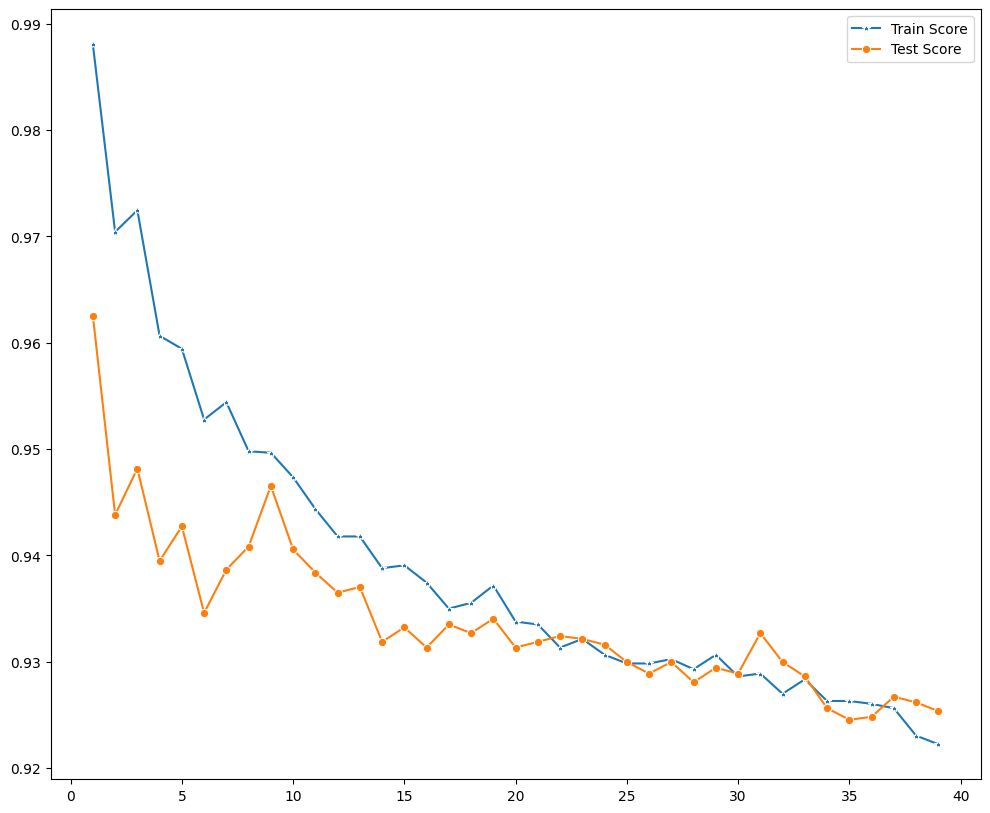

In [ ]:
plt.figure(figsize=(12,10))
graph = sns.lineplot(x=range(1,40),y=train_scores,marker='*',label='Train Score')
graph = sns.lineplot(x=range(1,40),y=test_scores,marker='o',label='Test Score')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Legitimate,Phishing,All
True,,,
Legitimate,1952,100,2052
Phishing,175,1458,1633
All,2127,1558,3685


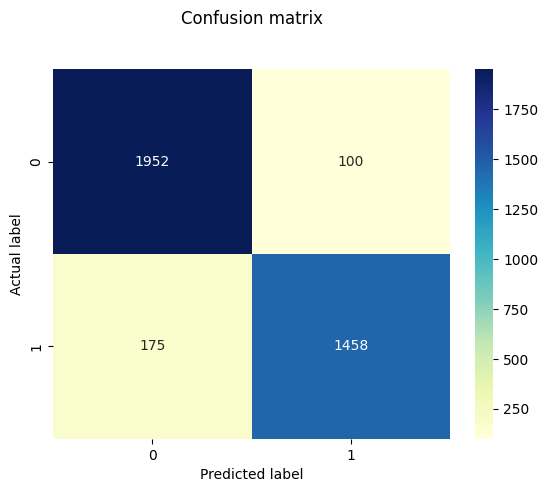

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Legitimate       0.92      0.95      0.93      2052
    Phishing       0.94      0.89      0.91      1633

    accuracy                           0.93      3685
   macro avg       0.93      0.92      0.92      3685
weighted avg       0.93      0.93      0.93      3685



---
# KNN + GA


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from random import randint

def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=1/3, random_state=42, stratify=label)
    return X_tr, X_te, Y_tr, Y_te

def initilization_of_population(size, n_feat):
  population = []
  for i in range(size):
    chromosome = np.ones(n_feat, dtype=np.bool)
    chromosome[:int(0.3*n_feat)] = False
    np.random.shuffle(chromosome)
    population.append(chromosome)
  return population

def fitness_score(population):
  scores = []
  for chromosome in population:
    logmodel.fit(X_train.iloc[:,chromosome], Y_train)
    predictions = logmodel.predict(X_test.iloc[:,chromosome])
    scores.append(accuracy_score(Y_test, predictions))
  scores, population = np.array(scores), np.array(population)
  inds = np.argsort(scores)
  return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit, n_parents):
  population_nextgen = []
  for i in range(n_parents):
    population_nextgen.append(pop_after_fit[i])
  return population_nextgen

def crossover(pop_after_sel):
  pop_nextgen = pop_after_sel
  for i in range(0, len(pop_after_sel),2):
    new_par = []
    child_1,child_2 = pop_nextgen[i], pop_nextgen[i+1]
    new_par = np.concatenate((child_1[:len(child_1)//2], child_2[len(child_1)//2:]))
    pop_nextgen.append(new_par)
  return pop_nextgen

def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])

    return best_chromo,best_score
    #return max(best_score)


In [ ]:
# #dataset_phising = pd.read_csv("phising_website_dataset.csv")
# #label_phising = dataset_phising['Result']
# #dataset_phising.drop(['Result'], axis=1, inplace=True)
# print("dataset web phising:\n",dataset_phising.shape[0],"information\n",dataset_phising.shape[1],"Features")

In [ ]:
# logmodel = KNeighborsClassifier()
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42, stratify=Y)
# chromo_data_phising, score_phising = generations(X, Y, size=80, n_feat=dataset.shape[1],
#                                                  n_parents=64, mutation_rate=0.30, n_gen=20, X_train = X_train, X_test=X_test,
#                                                  Y_train=Y_train, Y_test=Y_test)

In [ ]:
data_bc = pd.read_csv("phising_website_dataset.csv")
label_bc = data_bc["Result"]
#label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["Result"],axis = 1,inplace = True)

In [ ]:
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)

knn_ga_acc = []

for i in range(1,40):
  logmodel = KNeighborsClassifier(i)
  knn_ga_acc.append(generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                          X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test))

<ipython-input-22-54551413695c>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chromosome = np.ones(n_feat, dtype=np.bool)
<ipython-input-22-54551413695c>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chromosome = np.ones(n_feat, dtype=np.bool)
<ipython-input-22-54551413695c>:12: DeprecationWarning: `np.bool` is a deprecated alias for the bu

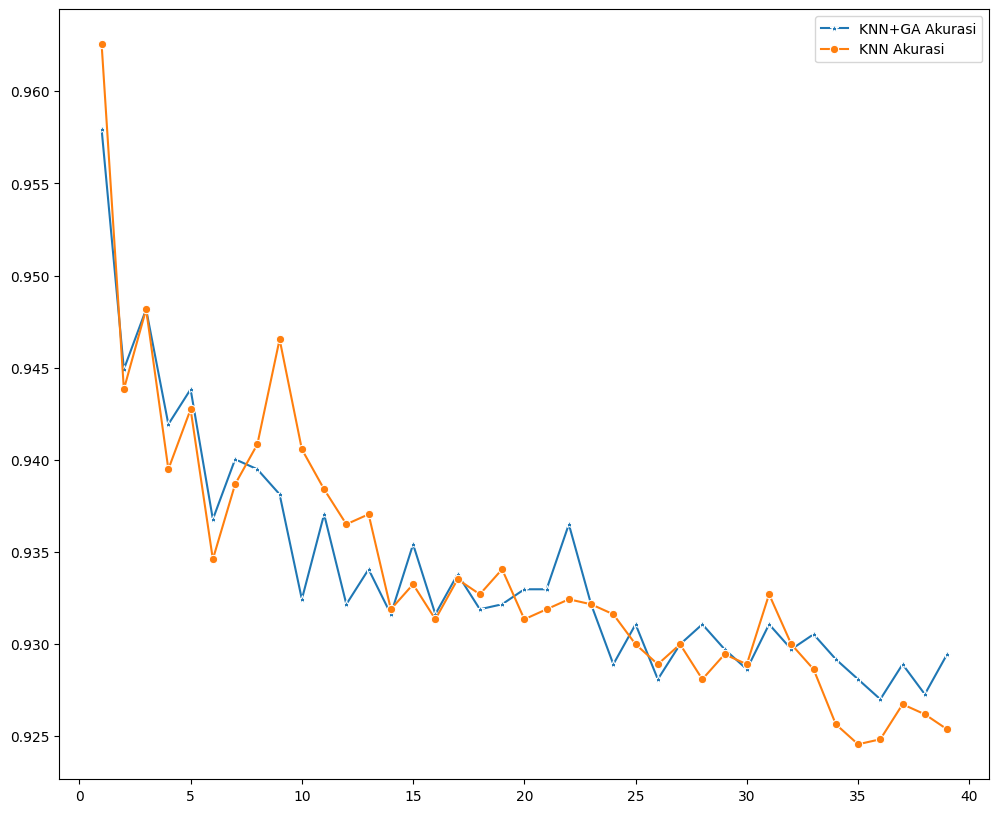

In [ ]:
plt.figure(figsize=(12,10))
graph = sns.lineplot(x=range(1,40),y=knn_ga_acc,marker='*',label='KNN+GA Akurasi')
graph = sns.lineplot(x=range(1,40),y=test_scores,marker='o',label='KNN Akurasi')

In [ ]:
import scipy.stats as stats

statistic, pvalue = stats.ttest_ind(a=test_scores, b=knn_ga_acc, equal_var=True)
print('nilai p value ', pvalue)


nilai p value  0.9930420840879963


In [ ]:
d = {'KNN': test_scores, 'KNN+GA': knn_ga_acc}
df = pd.DataFrame(data=d)
df

,KNN,KNN+GA
0,0.962551,0.957938
1,0.943826,0.944912
2,0.948168,0.948168
3,0.939484,0.941927
4,0.942741,0.943826
5,0.934600,0.936771
6,0.938670,0.940027
7,0.940841,0.939484
8,0.946540,0.938128
9,0.940570,0.932429
